In [33]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
sb.set()

# Machine learning algorithm part 2

### The classification accuracy is poor for all of our trees. In an attempt remedy this, we will convert the dataset into new data frames with true or false binary values for individual damage grades, and run them through the classification tree models again individually. This should increase our classification accuracy

In [34]:
train = pd.read_csv('train_values.csv')
test =  pd.DataFrame(train[-55000:])

#converting damage grade into binary true or false values for damage grade 3 for T/F classification on train
findL = [2, 1]
replaceL = [0, 0]
col = 'damage_grade';
train[col] = train[col].replace(findL, replaceL)
findD = [3]
replaceD = [1]
train[col] = train[col].replace(findD, replaceD)
train.head()

#converting damage grade into binary true or false values for damage grade 3 for T/F classification on test
findL = [2, 1]
replaceL = [0, 0]
col = 'damage_grade';
test[col] = train[col].replace(findL, replaceL)
findD = [3]
replaceD = [1]
test[col] = train[col].replace(findD, replaceD)
test.head()


#train DFs
tr_dmgDF = pd.DataFrame(train['damage_grade'])
tr_ageDF = pd.DataFrame(train['age'])
tr_floorsDF = pd.DataFrame(train['count_floors_pre_eq'])
tr_heightDF = pd.DataFrame(train['height_percentage'])
tr_areaDF = pd.DataFrame(train['area_percentage'])

#test DFs
te_dmgDF = pd.DataFrame(test['damage_grade'])
te_ageDF = pd.DataFrame(test['age'])
te_floorsDF = pd.DataFrame(test['count_floors_pre_eq'])
te_heightDF = pd.DataFrame(test['height_percentage'])
te_areaDF = pd.DataFrame(test['area_percentage'])



## Decision tree to classify buildings as damage grade 3: True or False


### Using height as a predictor for grade 3

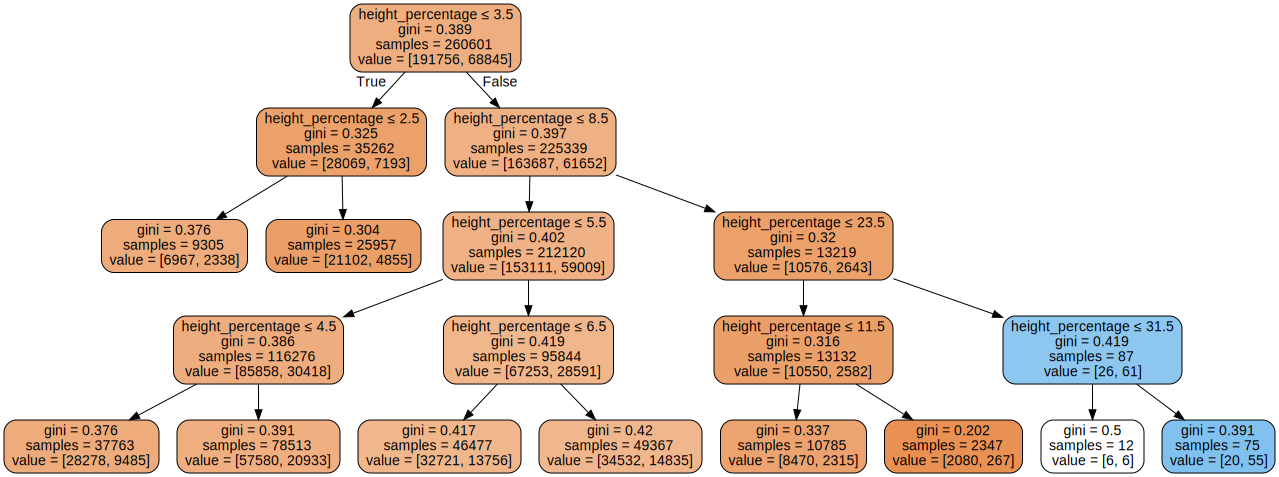

In [35]:
#importing tree classifier, graphviz

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz
#creating dectree object and training / fitting 

dectree = DecisionTreeClassifier(max_depth = 4)

dectree.fit(tr_heightDF, tr_dmgDF)

treedot = export_graphviz(dectree,
                         feature_names = tr_heightDF.columns,
                         out_file = None,
                         filled = True,
                         rounded = True,
                         special_characters = True)
graphviz.Source(treedot)

Classification Accuracy on train data 	: 0.7359565005506502
-------------------------------------------------------------------
Classification Accuracy on test data 	: 0.9996545454545455


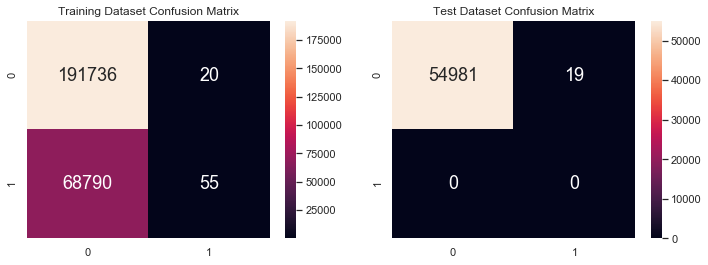

In [36]:
tr_dmgDF_pred = dectree.predict(tr_heightDF)
te_dmgDF_pred = dectree.predict(te_heightDF)

from sklearn.metrics import confusion_matrix


f, axes = plt.subplots(1, 2, figsize=(12,4))
sb.heatmap(confusion_matrix(tr_dmgDF, tr_dmgDF_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0]).set_title('Training Dataset Confusion Matrix')

sb.heatmap(confusion_matrix(te_dmgDF, te_dmgDF_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1]).set_title('Test Dataset Confusion Matrix')

print("Classification Accuracy on train data \t:", dectree.score(tr_heightDF, tr_dmgDF))
print("-------------------------------------------------------------------")
print("Classification Accuracy on test data \t:", dectree.score(te_heightDF, te_dmgDF))



### Using Age as a predictor for grade 3

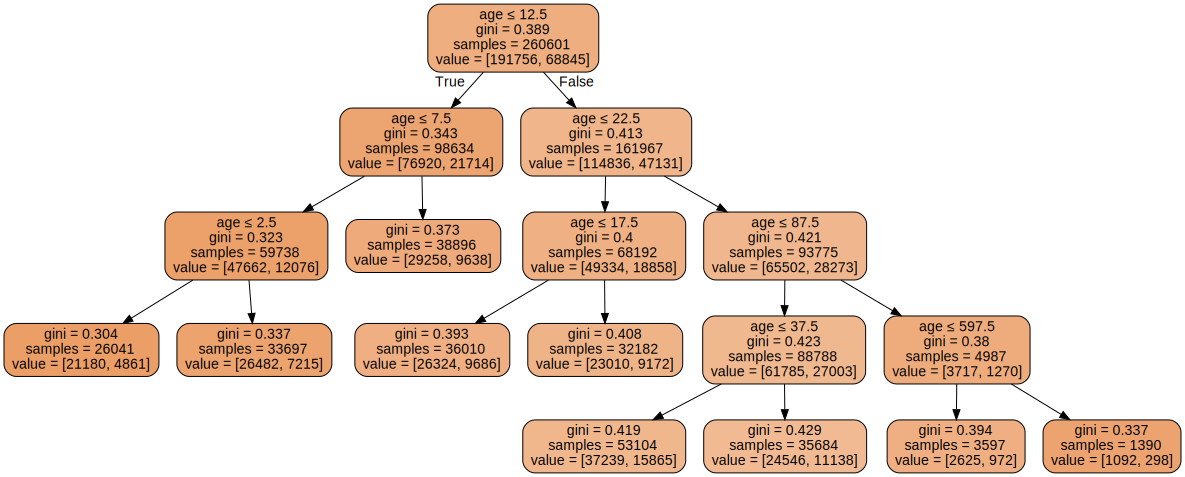

In [37]:
dectree = DecisionTreeClassifier(max_depth = 4)

dectree.fit(tr_ageDF, tr_dmgDF)

treedot = export_graphviz(dectree,
                         feature_names = tr_ageDF.columns,
                         out_file = None,
                         filled = True,
                         rounded = True,
                         special_characters = True)
graphviz.Source(treedot)

Classification Accuracy on train data 	: 0.7358221956170544


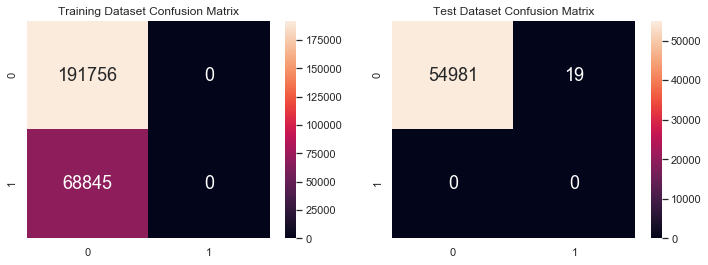

In [38]:
tr_dmgDF_pred = dectree.predict(tr_ageDF)



from sklearn.metrics import confusion_matrix

f, axes = plt.subplots(1, 2, figsize=(12,4))
sb.heatmap(confusion_matrix(tr_dmgDF, tr_dmgDF_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0]).set_title('Training Dataset Confusion Matrix')

sb.heatmap(confusion_matrix(te_dmgDF, te_dmgDF_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1]).set_title('Test Dataset Confusion Matrix')

print("Classification Accuracy on train data \t:", dectree.score(tr_heightDF, tr_dmgDF))

### Using floor count as a predictor for grade 3

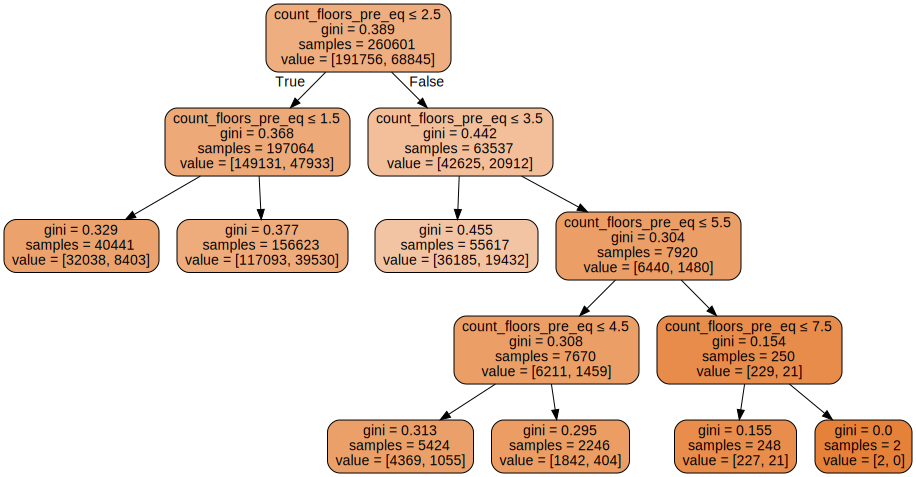

In [39]:
dectree = DecisionTreeClassifier(max_depth = 4)

dectree.fit(tr_floorsDF, tr_dmgDF)

treedot = export_graphviz(dectree,
                         feature_names = tr_floorsDF.columns,
                         out_file = None,
                         filled = True,
                         rounded = True,
                         special_characters = True)
graphviz.Source(treedot)

In [40]:
tr_dmgDF_pred = dectree.predict(tr_floorsDF)
te_dmgDF_pred = dectree.predict(te_floorsDF)

print("Classification Accuracy on train data \t:", dectree.score(tr_floorsDF, tr_dmgDF))
print("Classification Accuracy on test data \t:", dectree.score(te_floorsDF, te_dmgDF))


Classification Accuracy on train data 	: 0.7358221956170544
Classification Accuracy on test data 	: 1.0


### Using area percentage as a predictor for grade 3

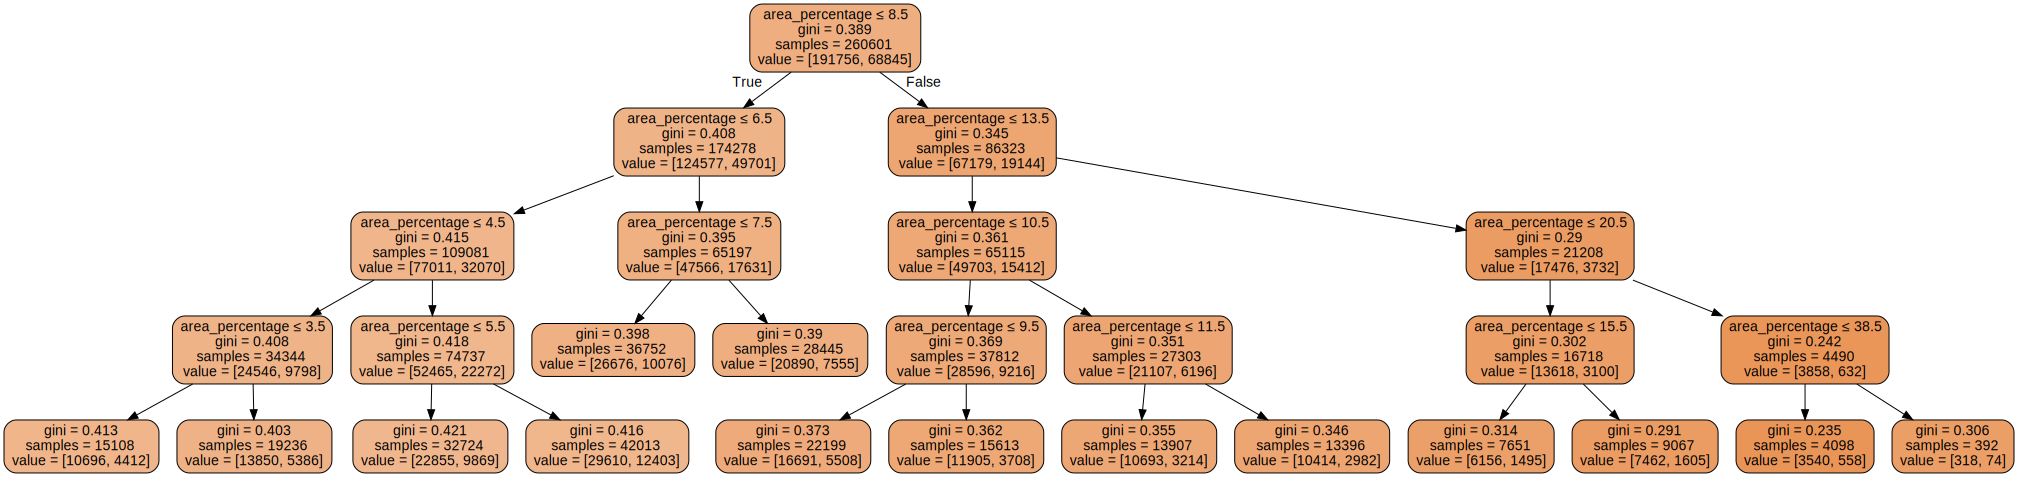

In [41]:
dectree = DecisionTreeClassifier(max_depth = 4)

dectree.fit(tr_areaDF, tr_dmgDF)

treedot = export_graphviz(dectree,
                         feature_names = tr_areaDF.columns,
                         out_file = None,
                         filled = True,
                         rounded = True,
                         special_characters = True)
graphviz.Source(treedot)

In [42]:
tr_dmgDF_pred = dectree.predict(tr_areaDF)


print("Classification Accuracy on train data \t:", dectree.score(tr_areaDF, tr_dmgDF))


sb.heatmap(confusion_matrix(tr_dmgDF, tr_dmgDF_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0]).set_title('Training Dataset Confusion Matrix')



Classification Accuracy on train data 	: 0.7358221956170544


Text(0.5, 1, 'Training Dataset Confusion Matrix')

### Multi-Variate Decision Tree for grade 3 -> not visualized due to high max depth, comment in if wanted

Classification Accuracy on train data 	: 0.7418313820745124
Classification Accuracy on test data	: 0.9942363636363636


Text(0.5, 1, 'Test Dataset Confusion Matrix')

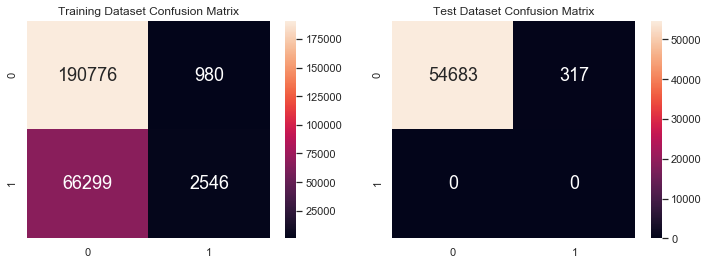

In [43]:
y_train = tr_dmgDF
X_train = pd.DataFrame(train[["age", "count_floors_pre_eq", "height_percentage", "area_percentage"]])
dectree = DecisionTreeClassifier(max_depth = 20)  
dectree.fit(X_train, y_train)                    


y_test = te_dmgDF
X_test = pd.DataFrame(test[["age", "count_floors_pre_eq", "height_percentage", "area_percentage"]])
                    

# Plot the Decision Tree
from sklearn.tree import export_graphviz
treedot = export_graphviz(dectree,                                      
                          feature_names = X_train.columns,              
                          out_file = None,                              
                          filled = True,                                
                          rounded = True,                               
                          special_characters = True)                    

#import graphviz
#graphviz.Source(treedot)   -> comment in to visualize

y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)
print("Classification Accuracy on train data \t:", dectree.score(X_train, y_train))
print("Classification Accuracy on test data\t:", dectree.score(X_test, y_test))


f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0]).set_title('Training Dataset Confusion Matrix')
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1]).set_title('Test Dataset Confusion Matrix')


### We can see that through converting to true or false binary values for the individual damage grades, we have significantly increased our classification accuracy. We will now do the same for damage grades 1 and 2.

## Decision tree to classify buildings as damage grade 2: True or False


In [44]:
#converting damage grade into binary true or false values for damage grade 2 for T/F classification
train = pd.read_csv('train_values.csv')

findL = [1, 3]
replaceL = [0, 0]
col = 'damage_grade';
train[col] = train[col].replace(findL, replaceL)
findD = [2]
replaceD = [1]
train[col] = train[col].replace(findD, replaceD)
train

tr_dmgDF = pd.DataFrame(train['damage_grade'])
tr_ageDF = pd.DataFrame(train['age'])
tr_floorsDF = pd.DataFrame(['count_floors_pre_eq'])
tr_heightDF = pd.DataFrame(train['height_percentage'])
tr_areaDF = pd.DataFrame(train['area_percentage'])


### Using height as a predictor for grade 2

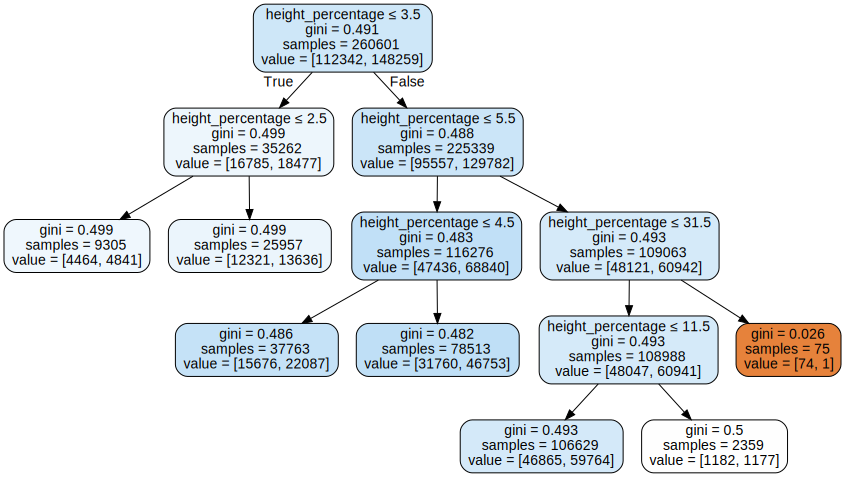

In [45]:
dectree = DecisionTreeClassifier(max_depth = 4)

dectree.fit(tr_heightDF, tr_dmgDF)

treedot = export_graphviz(dectree,
                         feature_names = tr_heightDF.columns,
                         out_file = None,
                         filled = True,
                         rounded = True,
                         special_characters = True)
graphviz.Source(treedot)

Classification Accuracy on train data 	: 0.5692111695657346


Text(0.5, 1, 'Training Dataset Confusion Matrix')

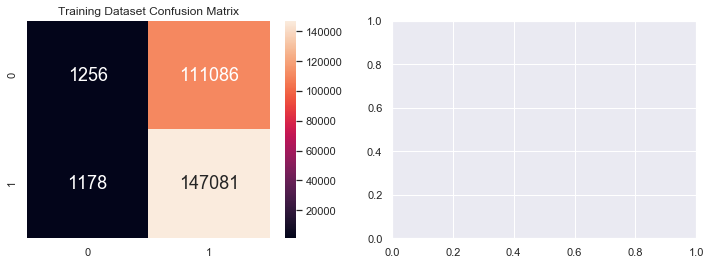

In [46]:
tr_dmgDF_pred = dectree.predict(tr_heightDF)

print("Classification Accuracy on train data \t:", dectree.score(tr_heightDF, tr_dmgDF))

from sklearn.metrics import confusion_matrix

f, axes = plt.subplots(1, 2, figsize=(12,4))
sb.heatmap(confusion_matrix(tr_dmgDF, tr_dmgDF_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0]).set_title('Training Dataset Confusion Matrix')



### Using Age as a predictor for grade 2

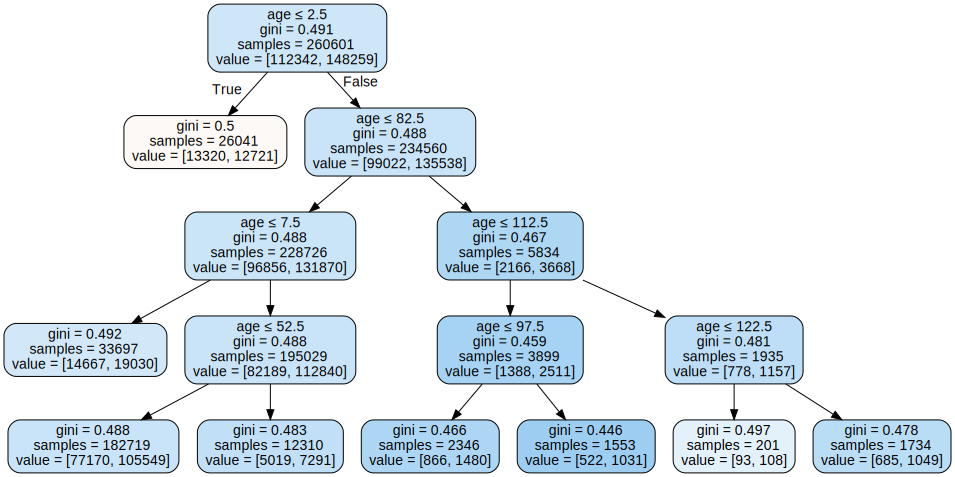

In [47]:
dectree = DecisionTreeClassifier(max_depth = 4)

dectree.fit(tr_ageDF, tr_dmgDF)

treedot = export_graphviz(dectree,
                         feature_names = tr_ageDF.columns,
                         out_file = None,
                         filled = True,
                         rounded = True,
                         special_characters = True)
graphviz.Source(treedot)

Classification Accuracy on train data 	: 0.5712103944344036


Text(0.5, 1, 'Training Dataset Confusion Matrix')

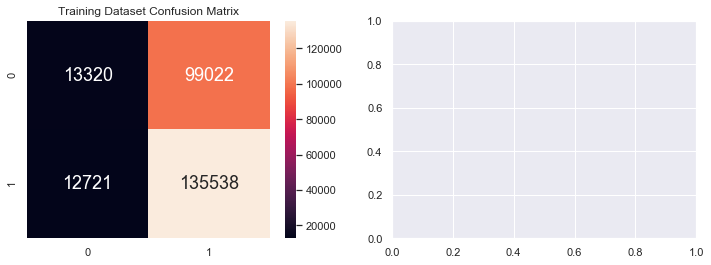

In [48]:
tr_dmgDF_pred = dectree.predict(tr_ageDF)


print("Classification Accuracy on train data \t:", dectree.score(tr_ageDF, tr_dmgDF))

from sklearn.metrics import confusion_matrix

f, axes = plt.subplots(1, 2, figsize=(12,4))
sb.heatmap(confusion_matrix(tr_dmgDF, tr_dmgDF_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0]).set_title('Training Dataset Confusion Matrix')


### Using area percentage as a predictor for grade 2

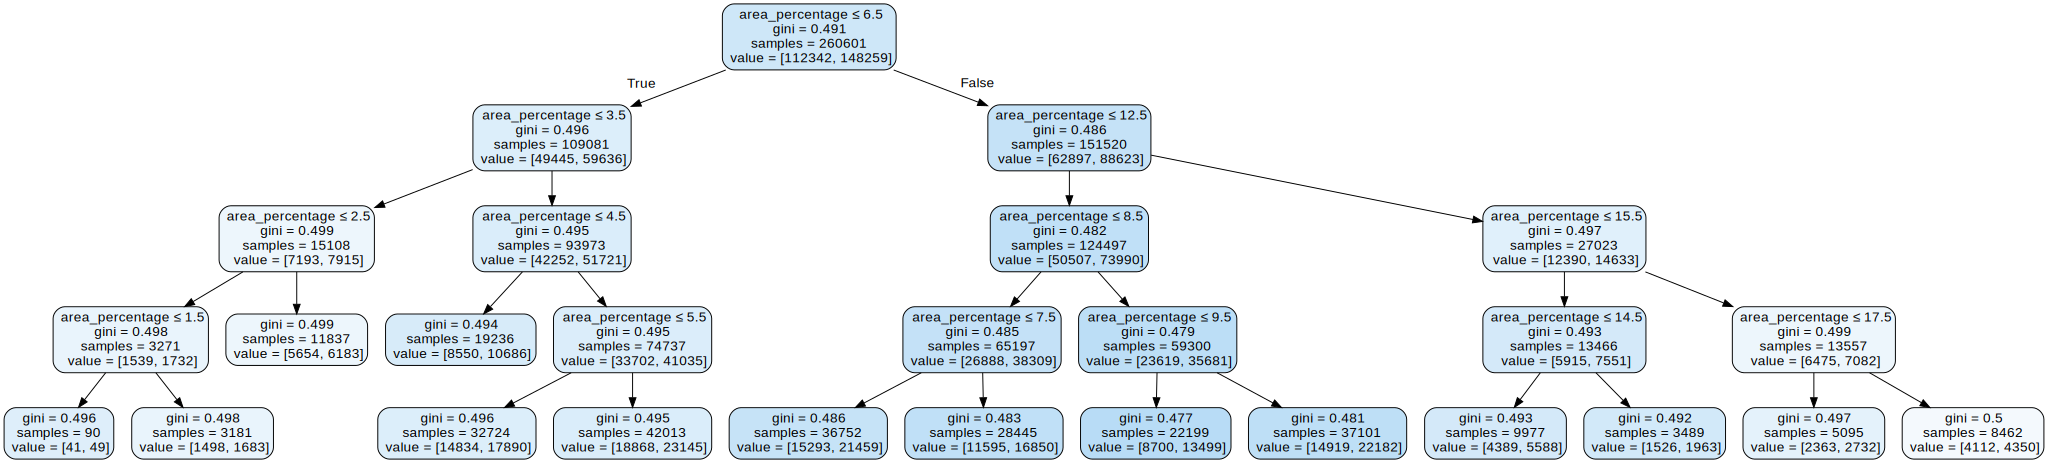

In [49]:
dectree = DecisionTreeClassifier(max_depth = 4)

dectree.fit(tr_areaDF, tr_dmgDF)

treedot = export_graphviz(dectree,
                         feature_names = tr_areaDF.columns,
                         out_file = None,
                         filled = True,
                         rounded = True,
                         special_characters = True)
graphviz.Source(treedot)

In [50]:
tr_dmgDF_pred = dectree.predict(tr_areaDF)


print("Classification Accuracy on train data \t:", dectree.score(tr_areaDF, tr_dmgDF))


sb.heatmap(confusion_matrix(tr_dmgDF, tr_dmgDF_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0]).set_title('Training Dataset Confusion Matrix')



Classification Accuracy on train data 	: 0.5689118614280068


Text(0.5, 1, 'Training Dataset Confusion Matrix')

### Multi-Variate Decision Tree for grade 2 -> not visualized due to high max depth, comment in if wanted

Classification Accuracy 	: 0.6052893120133844


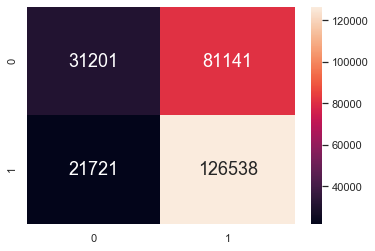

In [51]:
y_train = tr_dmgDF
X_train = pd.DataFrame(train[["age", "count_floors_pre_eq", "height_percentage", "area_percentage"]])
dectree = DecisionTreeClassifier(max_depth = 20)  
dectree.fit(X_train, y_train)                    

# Plot the Decision Tree
from sklearn.tree import export_graphviz
treedot = export_graphviz(dectree,                                      
                          feature_names = X_train.columns,              
                          out_file = None,                              
                          filled = True,                                
                          rounded = True,                               
                          special_characters = True)                    

#import graphviz
#graphviz.Source(treedot)   -> comment in to visualize

y_train_pred = dectree.predict(X_train)
print("Classification Accuracy \t:", dectree.score(X_train, y_train))

sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

# Using classification trees to classify and predict if buildings have damage grade 1

In [52]:
#converting damage grade into binary true or false values for damage grade 2 for T/F classification
train = pd.read_csv('train_values.csv')

findL = [2, 3]
replaceL = [0, 0]
col = 'damage_grade';
train[col] = train[col].replace(findL, replaceL)
findD = [1]
replaceD = [1]
train[col] = train[col].replace(findD, replaceD)
train

tr_dmgDF = pd.DataFrame(train['damage_grade'])
tr_ageDF = pd.DataFrame(train['age'])
tr_floorsDF = pd.DataFrame(['count_floors_pre_eq'])
tr_heightDF = pd.DataFrame(train['height_percentage'])
tr_areaDF = pd.DataFrame(train['area_percentage'])



### Using height as a predictor for grade 1

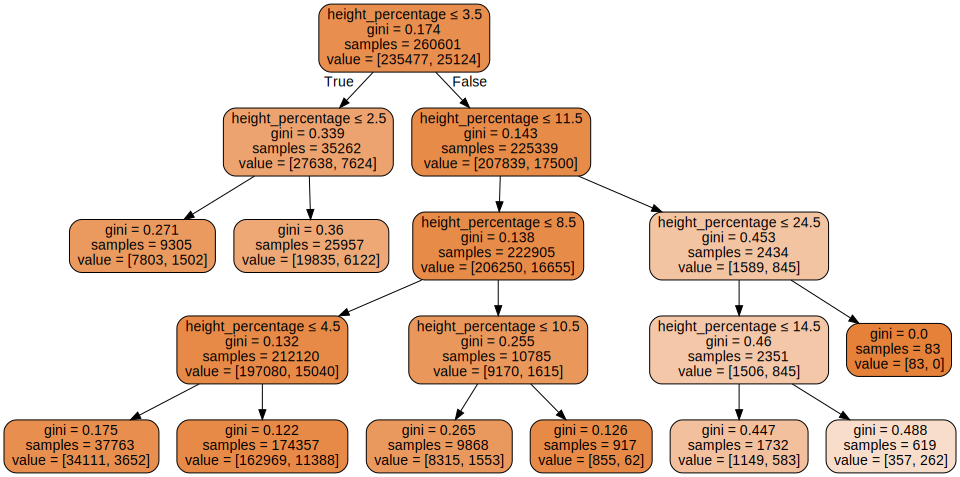

In [53]:
dectree = DecisionTreeClassifier(max_depth = 4)

dectree.fit(tr_heightDF, tr_dmgDF)

treedot = export_graphviz(dectree,
                         feature_names = tr_heightDF.columns,
                         out_file = None,
                         filled = True,
                         rounded = True,
                         special_characters = True)
graphviz.Source(treedot)

Classification Accuracy 	: 0.9035920813811152


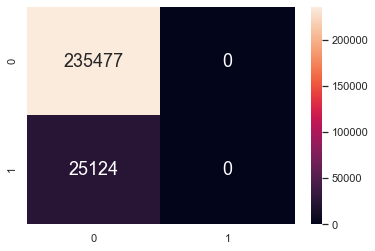

In [54]:
tr_dmgDF_pred = dectree.predict(tr_heightDF)

print("Classification Accuracy \t:", dectree.score(tr_heightDF, tr_dmgDF))

from sklearn.metrics import confusion_matrix

sb.heatmap(confusion_matrix(tr_dmgDF, tr_dmgDF_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

### Using Age as a predictor for grade 1

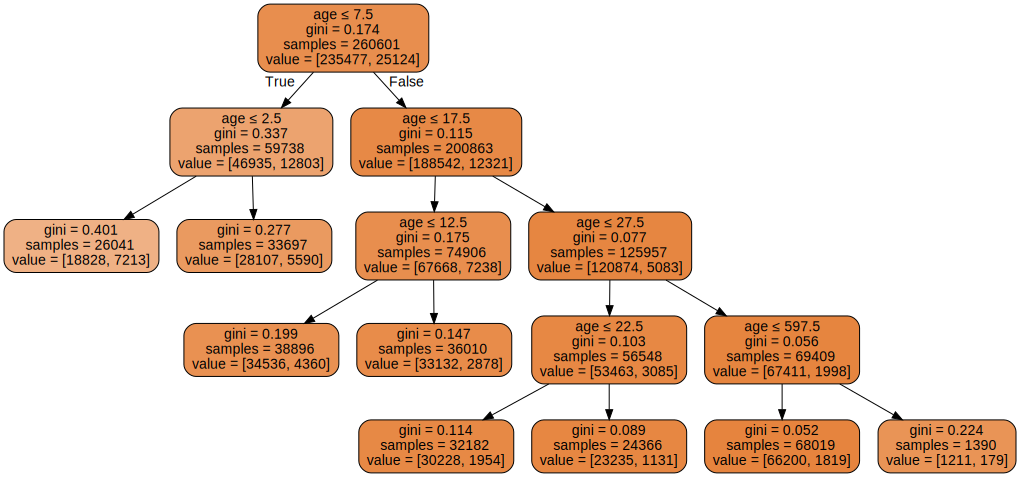

In [55]:
dectree = DecisionTreeClassifier(max_depth = 4)

dectree.fit(tr_ageDF, tr_dmgDF)

treedot = export_graphviz(dectree,
                         feature_names = tr_ageDF.columns,
                         out_file = None,
                         filled = True,
                         rounded = True,
                         special_characters = True)
graphviz.Source(treedot)

Classification Accuracy 	: 0.9035920813811152


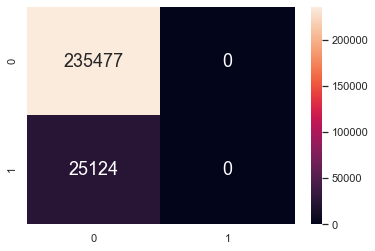

In [56]:
tr_dmgDF_pred = dectree.predict(tr_ageDF)

print("Classification Accuracy \t:", dectree.score(tr_ageDF, tr_dmgDF))

from sklearn.metrics import confusion_matrix

sb.heatmap(confusion_matrix(tr_dmgDF, tr_dmgDF_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

### Using area percentage as a predictor for grade 1

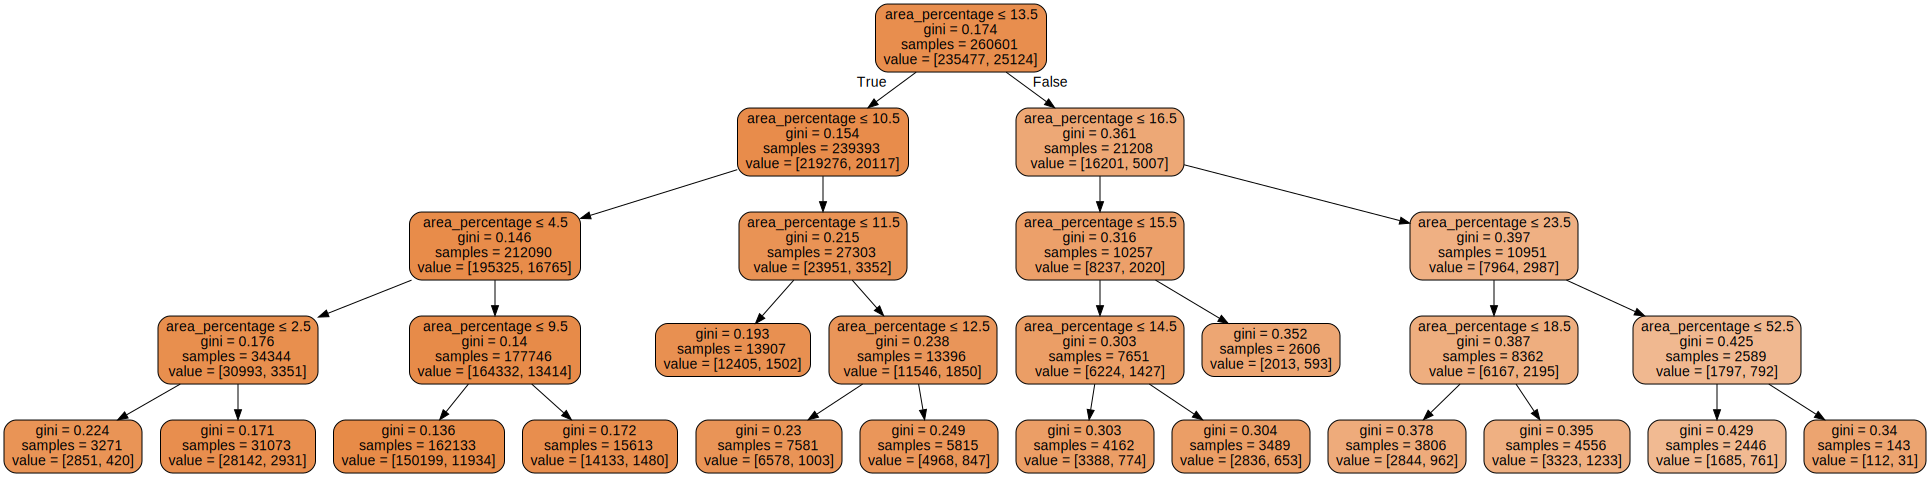

In [57]:
dectree = DecisionTreeClassifier(max_depth = 4)

dectree.fit(tr_areaDF, tr_dmgDF)

treedot = export_graphviz(dectree,
                         feature_names = tr_areaDF.columns,
                         out_file = None,
                         filled = True,
                         rounded = True,
                         special_characters = True)
graphviz.Source(treedot)

In [58]:
tr_dmgDF_pred = dectree.predict(tr_areaDF)

print("Classification Accuracy \t:", dectree.score(tr_areaDF, tr_dmgDF))


Classification Accuracy 	: 0.9035920813811152


### Multi-Variate Decision Tree for grade 1 -> not visualized due to high max depth, comment in if wanted

Classification Accuracy 	: 0.910245931519833


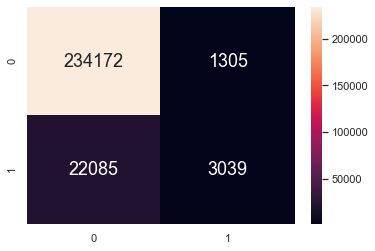

In [59]:
y_train = tr_dmgDF
X_train = pd.DataFrame(train[["age", "count_floors_pre_eq", "height_percentage", "area_percentage"]])
dectree = DecisionTreeClassifier(max_depth = 20)  
dectree.fit(X_train, y_train)                    

# Plot the Decision Tree
from sklearn.tree import export_graphviz
treedot = export_graphviz(dectree,                                      
                          feature_names = X_train.columns,              
                          out_file = None,                              
                          filled = True,                                
                          rounded = True,                               
                          special_characters = True)                    

#import graphviz
#graphviz.Source(treedot)   -> comment in to visualize

y_train_pred = dectree.predict(X_train)
print("Classification Accuracy \t:", dectree.score(X_train, y_train))

sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

NameError: name 'ttt1' is not defined